# Определение перспективного тарифа для телеком-компании <a class="tocSkip">

В нашем распоряжении имеются данные о 500 пользователей компании «Мегалайн» — федерального оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Описание тарифов**

|Наименование            | Тариф «Смарт»   | Тариф «Ультра»|
|-------------           |---------------  | ------------- |
| Ежемесячная плата      | 550 рублей      |   1950 руб.   |
| Звонки             | 500 минут       |   3000 минут  |
| Сообщения         | 50 сообщений    |1000 сообщений | 
| Интернет          | 15 гб           |   30 гб       |
| **Услуги сверхпакета:**
| Звонки           | 3 рубля         |  1 рубль      |
| Сообщения         | 3 рубля         |  1 рубль      |
| Интернет          | 200 рублей      |  150 рублей   |

**Цель исследования** — для корректировки рекламного бюджета необходимо понять какой тариф приносит больше денег. 

**Ход исследования**


1. Обзор данных
2. Преобработка данных
3. Анализ данных
4. Проверка гипотез
6. Общий вывод



# Обзор данных

In [1]:
#импортируем необходимые библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
from math import factorial
from scipy import stats as st

In [2]:
#прочитаем файлы с сохранием их в соотвующей переменной
try:
    calls = pd.read_csv('/datasets/calls.csv')
except:
    calls = pd.read_csv('Downloads/calls.csv')
try:
    internet = pd.read_csv('/datasets/internet.csv')
except:
    internet = pd.read_csv('Downloads/internet.csv')
try:
    messages = pd.read_csv('/datasets/messages.csv')
except:    
    messages = pd.read_csv('Downloads/messages.csv')
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:    
    tariffs = pd.read_csv('Downloads/tariffs.csv')
try:
    users = pd.read_csv('/datasets/users.csv')    
except: 
    users = pd.read_csv('Downloads/users.csv') 

Далее проверим каждый датасет по отдельности. 

## Информация о звонках

- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

In [3]:
calls.info() #посмотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.describe() #посмотрим статистическую информацию

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
calls.sample(10) #посмотрим рандомные 10 строк таблицы

,id,call_date,duration,user_id
68355,1173_88,2018-08-19,15.64,1173
4624,1012_98,2018-10-27,5.59,1012
33134,1081_379,2018-07-24,0.00,1081
61713,1155_521,2018-12-11,3.86,1155
99088,1251_450,2018-09-29,10.03,1251
92848,1233_193,2018-10-31,6.40,1233
149363,1377_210,2018-09-10,5.20,1377
19565,1053_186,2018-12-06,17.54,1053
196671,1482_38,2018-09-13,0.00,1482
60949,1153_195,2018-10-28,23.12,1153


**Вывод**:
- `id` необходимо перевести в формат int32, также как и `user_id`,
- `call_date` необходимо привести к формату дат,
- `duration` необходимо перевести в int32, а также округлить значения вверх.

## Информация об интернет-сессиях

- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

In [6]:
internet.info() #посмотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
internet.describe() #посмотрим статистическую информацию

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [8]:
internet.sample(10)#посмотрим рандомные 10 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
113218,113218,1383_26,885.74,2018-11-21,1383
85183,85183,1290_213,13.49,2018-06-02,1290
129638,129638,1432_126,512.99,2018-10-03,1432
108181,108181,1369_210,260.67,2018-08-31,1369
10168,10168,1035_3,485.97,2018-05-07,1035
102250,102250,1341_365,377.67,2018-11-25,1341
99333,99333,1332_307,425.33,2018-06-13,1332
25690,25690,1088_325,0.00,2018-07-18,1088
148461,148461,1496_409,0.00,2018-04-08,1496
111165,111165,1377_49,630.58,2018-06-10,1377


**Вывод:**

- непонятный столбец `Unnamed: 0` (описание к нему отсутствовало), судя по таблице - эта колонка дублирует индексы, ее можно удалить,
- `id` стоит перевести в формат int32, так же как и `user_id`,
- `mb_used` необходимо превести к формату int32 с округлением вверх,
- `session_date` необходимо перевести в формат дат.

## Информация о сообщениях

- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

In [9]:
messages.info() #посмотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messages.describe() #посмотрим статистическую информацию

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [11]:
messages.sample(10) #посмотрим рандомные 10 строк таблицы

,id,message_date,user_id
42157,1181_30,2018-12-10,1181
119446,1483_381,2018-07-24,1483
17387,1076_536,2018-09-18,1076
25541,1104_733,2018-08-02,1104
31002,1135_36,2018-11-24,1135
86377,1358_6,2018-04-16,1358
12629,1054_185,2018-07-24,1054
37970,1165_324,2018-12-30,1165
115004,1471_232,2018-04-04,1471
32928,1145_581,2018-10-07,1145


**Вывод**

- `id` и `user_id` необходимо перевести в формат int32, 
- `message_date` необходимо перевести в формат дат.

## Информация о пользователях

- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

In [12]:
users.info() #посмотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users.describe() #посмотрим статистическую информацию

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [14]:
users.sample(10)#посмотрим рандомные 10 строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
177,1177,75,NaN,Новосибирск,Лолита,Аничкина,2018-06-19,smart
178,1178,56,NaN,Москва,Наталья,Жарова,2018-05-15,smart
334,1334,45,NaN,Владивосток,Пётр,Минаев,2018-11-16,smart
379,1379,39,NaN,Москва,Нелли,Кочергина,2018-08-09,ultra
106,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra
74,1074,68,NaN,Якутск,Андрей,Кравцов,2018-12-30,smart
486,1486,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart
265,1265,24,2018-10-04,Омск,Радим,Адамов,2018-06-24,ultra
443,1443,21,NaN,Казань,Иван,Афинин,2018-09-17,smart


**Вывод**:
- `user_id` и `age` необходимо перевести в формат int32,
- имеется большое количество пропусков в колонке `churn_date` (дата прекращения пользования тарифом), но есть информация о том, что если значение пропущено, то тариф еще действовал на момент выгрузки данных,
- данные в колонке `reg_date` необходимо перевести в формат дат.

## Информация о тарифах

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [15]:
tariffs.info() #посмотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
tariffs.describe() #посмотрим статистическую информацию

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [17]:
tariffs.head()#посмотрим первые 5 строк таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод:**
- с таблицей все в порядке.

## Вывод по обзору данных

По итогам обзора данных были сделаны следующие выводы:
* для таблицы с данными о звонках:
   - `id`, `user_id` перевести в формат int32,
   - `call_date` необходимо привести к формату дат,
   - `duration` необходимо перевести в int32, а также округлить значение вверх.
* для таблицы с данными об интернет-сессиях:
   - необходимо удалить столбец`Unnamed: 0`
   - `id`, `user_id` стоит перевести в формат int32, 
   - `mb_used` необходимо превести к формату int32 с округлением вверх
   - `session_date` необходимо перевести в формат дат
* для таблицы с данными о сообщениях:
   - `id`, `user_id` необходимо перевести в формат int32, 
   - `message_date` необходимо перевести в формат дат
* для таблицы с данными о пользователях:    
   - в `churn_date` имееются пропуски,
   - `reg_date` необходимо перевести в формат дат.

# Предобработка данных

## Заполнение пропусков

Исходя из предобработки данных случайных пропусков найдено не было. Однако, были обнаружены нулевые значение в колонках duration таблицы `calls` и mb_used таблицы `internet`.

In [18]:
display('Пропущенные значения в столбце duration таблицы calls:, {:.2%}'.format(
    calls[calls['duration'] == 0].count()[0]/calls.shape[0]))
display('Пропущенные значения в столбце mb_used таблицы internet:, {:.2%}'.format(
    internet[internet['mb_used'] == 0].count()[0]/internet.shape[0]))


'Пропущенные значения в столбце duration таблицы calls:, 19.55%'

'Пропущенные значения в столбце mb_used таблицы internet:, 13.12%'

Нулевых значений довольно много, однако по имеющейся информации - нулями обозначены пропущенные звонки, поэтому их удалять не нужно. Нулевые значения в таблице об использовании интернета, возможно, связаны с тем, что у пользователя был подключен интернет, но он им не пользовался. Удалять их так же не будем.

Также были выявлены пропуски в колонке churn_date (дата прекращения пользования тарифом) таблицы `users`. Однако, по имеющейся информации, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому с пропущенными значениями мы пока тоже ничего делать не будем.

**Вывод**

Случайных пропусков обнаружено не было.

## Удаление дубликатов

Проверим таблицы на наличие дубликатов. 

In [19]:
calls.duplicated().sum() #проверка явных дубликатов таблицы calls

0

In [20]:
internet.duplicated().sum() #проверка явных дубликатов таблицы internet

0

In [21]:
messages.duplicated().sum() #проверка явных дубликатов таблицы messages

0

In [22]:
users.duplicated().sum() #проверка явных дубликатов таблицы users

0

Из всех таблиц только в одной колонке city таблицы `users` могут быть неявные дубликаты, так что, на всякий случай, ее тоже проверим. 

In [23]:
users['city'].unique() #посмотрим на уникальные значения в столбце

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Неявных дубликатов выявлено не было.

**Вывод**

Дубликаты не были обнаружены.

## Изменение типов данных

По итогам обзора данных были сделаны выводы о том, что типы данных в некоторых колонках таблиц необходимо заменить. Далее проводится их замена по каждой таблице в отдельности.

### Таблица с данными о звонках

In [24]:
#перевод формата в int
calls['id'] = calls['id'].astype('int') 
#перевод формата в int, а также округление в большую сторию в соответствии с условиями
calls['duration'] = calls['duration'].apply(np.ceil).astype('int') 
#перевод в формат дат 
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#перевод формата в int
calls['user_id'] = calls['user_id'].astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


### Таблица с данными об интернет-сессиях

В таблице с данными об интернет-сессиях был обнаружен столбец, описания которого в исходной документации не было. Т.к. этот столбец непонятно что собой представляет, а также для расчетов нам не нужен мы его удалим. 

In [25]:
#удаление неизвестного столбца
internet = internet.drop(columns = ['Unnamed: 0'])

#далее все итерации проводятся по аналогии с данными в таблице со звонками
internet['id'] = internet['id'].astype('int')
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['user_id'] = internet['user_id'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int64         
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.6 MB


### Таблица с данными о сообщениях

In [26]:
messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['user_id'] = messages['user_id'].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


### Таблица с данными о пользователях

In [27]:
users['user_id'] = users['user_id'].astype('int')
users['age'] = users['age'].astype('int')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод**

Были скорректированы типы данных, также все int64 приведены к int32 для уменьшения размера таблиц. Помимо того был удален неизвестный столбец Unnamed: 0 в таблице `internet`.

### Расчет показателей

Далее рассчитаем следующие показатели:
 * количество сделанных звонков и израсходованных минут разговора по месяцам,
 * количество отправленных сообщений по месяцам,
 * объем израсходованного интернет-трафика по месяцам,
 * помесячная выручка с каждого пользователя.

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [28]:
#добавим в таблицу calls новый столбец с номером месяца
calls['month'] = calls['call_date'].dt.month 

#создадим новый сгруппированный ДФ, в котором будут посчитаны количество звонков и 
#сумма потраченных минут в месяц по каждому пользователю
calls_month = calls.groupby(['user_id', 'month'])\
            .agg({'duration':'sum', 'id':'count'})\
            .reset_index()\
            .rename(columns={'duration':'month_calls_duration', 'id': 'calls_total_in_month'})

#выведем 5 строк таблицы для проверки
calls_month.head(5) 

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Была успешно создана новая таблица с информацией для каждого пользователя с количеством совершенных звоноков, а также истраченных минут за месяц.

**Количество отправленных сообщений по месяцам**

In [29]:
messages['month'] = messages['message_date'].dt.month
messages_month = messages.groupby(['user_id', 'month'])\
            .agg({'id':'count'})\
            .reset_index()\
            .rename(columns={'id': 'message_total_in_month'})
messages_month.head(5)

,user_id,month,message_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Была успешно создана новая таблица с информацией для каждого пользователя о количестве отправленных смс за месяц.

**Объем израсходованного интернет-трафика по месяцам**

In [30]:
internet['month'] = internet['session_date'].dt.month
internet_month = internet.groupby(['user_id', 'month'])\
            .agg({'mb_used':'sum'})\
            .reset_index()\
            .rename(columns={'mb_used': 'mb_total_in_month'})
internet_month.head(5)

,user_id,month,mb_total_in_month
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Была успешно создана новая таблица с информацией для каждого пользователя об объеме потраченного интернет-траффика за месяц.

**Помесячная выручка с каждого пользователя**

Для расчета помесячной выручки, полученной с каждого пользователя, нам необходимо будет объединить таблицы `calls_month`, `messages_month`, `internet_month`, `users`, а также `tariffs`.

In [31]:
#создадим новую таблицу data, к которой будем присоединять все остальные 
#к таблице calls_month присоединяем таблицу messages_month, далее internet_month и users
data = calls_month.merge(messages_month, on=['user_id', 'month'], how='outer')
data = data.merge(internet_month, on=['user_id', 'month'], how='outer')
data = data.merge(users, on='user_id', how='left')

#выведем 5 строк таблицы
data.head() 

,user_id,month,month_calls_duration,calls_total_in_month,message_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [32]:
#название колонок с типом тарифа в таблицах tariffs и data отличаются, 
#поэтому переименуем наименование колонки в таблице tariffs
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
#присоединяем к таблице data таблицу tariffs
data = data.merge(tariffs, on='tariff', how='left')

#выведем 5 строк таблицы
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,message_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [33]:
#проверим есть ли пропуски в новой таблице
data.isna().sum()

user_id                      0
month                        0
month_calls_duration        40
calls_total_in_month        40
message_total_in_month     497
mb_total_in_month           11
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff                       0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

Были обнаружены пропуски в колонках количество звонков и сумма минут в месяц, количество сообщений в месяц, а также количество использованного интернет-траффика. Т.к. пользователи могли просто не пользоваться какими-то услугами, то заменем данные пропущенные значения на 0.

In [34]:
data['month_calls_duration'] = data['month_calls_duration'].fillna(0)
data['calls_total_in_month'] = data['calls_total_in_month'].fillna(0)
data['message_total_in_month'] = data['message_total_in_month'].fillna(0)
data['mb_total_in_month'] = data['mb_total_in_month'].fillna(0)
data.isna().sum()

user_id                      0
month                        0
month_calls_duration         0
calls_total_in_month         0
message_total_in_month       0
mb_total_in_month            0
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff                       0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

In [35]:
#проверим на дубликаты новую таблицу
data.duplicated().sum()

0

Дубликатов в новой таблице обнаружено не было, значит, все совместили правильно.

Далее напишем функцию, которая будет рассчитывать количество минут, смс и интернет-траффика, потраченных сверх тарифа и сразу умножать на соответствующую стоимость сверх тарифа. 
Далее добавим дополнительный столбец с полученной стоимостью сверх тарифа. И потом еще один, который будет рассчитывать конечную выручку по пользователю.

In [36]:
#функция для расчета прибыли по данным, потраченных сверх тарифа
def extra_tariff(row):
    minutes = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    messages = (row['message_total_in_month'] - row['messages_included']) * row['rub_per_message']
    internet = ((row['mb_total_in_month'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    total = 0
    for i in [minutes, messages, internet]:
        if i > 0:
            total += i
    return total

data['extra_tariff'] = round(data.apply(lambda x: extra_tariff(x), axis = 1)) #добавляем новый столбец с выручкой сверх тарифа
data['revenue'] = round(data['rub_monthly_fee'] + data['extra_tariff']) #добавляем новый столбец с общей выручкой
data.sample(5)

,user_id,month,month_calls_duration,calls_total_in_month,message_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_tariff,revenue
2322,1373,5,13.0,2.0,48.0,29761.0,34,NaT,Улан-Удэ,Нелли,...,smart,50,15360,500,550,200,3,3,2813.0,3363.0
3001,1471,10,557.0,75.0,83.0,14036.0,35,NaT,Вологда,Элеонора,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2947,1464,9,542.0,74.0,21.0,16824.0,44,NaT,Саранск,Антонина,...,smart,50,15360,500,550,200,3,3,412.0,962.0
1092,1174,11,519.0,78.0,57.0,15278.0,29,NaT,Санкт-Петербург,Лолита,...,smart,50,15360,500,550,200,3,3,78.0,628.0
1234,1195,11,416.0,72.0,0.0,10448.0,19,NaT,Москва,Веселина,...,smart,50,15360,500,550,200,3,3,0.0,550.0


# Анализ данных

Далее посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [37]:
smart = data.query('tariff =="smart"') #создадим новую таблицу, в которой будут данные только по тарифу Смарт
ultra = data.query('tariff =="ultra"') #создадим новую таблицу, в которой будут данные только по тарифу Ультра
print('Количество использованных минут в месяц тарифа Smart: {:.0f}'.format(smart['month_calls_duration'].sum()/12),', тарифа Ultra: {:.0f}'.format(ultra['month_calls_duration'].sum()/12))
print('Количество отправленных смс тарифа Smart: {:.0f}'.format(smart['message_total_in_month'].sum()/12),', тарифа Ultra: {:.0f}'.format(ultra['message_total_in_month'].sum()/12))
print('Количество потраченного интернет-траффика тарифа Smart: {:.0f}'.format(smart['mb_total_in_month'].sum()/12),', тарифа Ultra: {:.0f}'.format(ultra['mb_total_in_month'].sum()/12))

print('Процент пользователей тарифа Смарт, платящих больше ежемесячной платы: {:.2%}'.format(
    smart[smart['revenue'] > 550].shape[0]/smart['revenue'].shape[0]))
print('Процент пользователей тарифа Ультра, платящих больше ежемесячной платы: {:.2%}'.format(
    ultra[ultra['revenue'] > 1950].shape[0]/ultra['revenue'].shape[0]))


#построим сводную, чтобы посмотреть количество пользователей у обоих тарифов
users_tariff = users.pivot_table(index='tariff', values = 'user_id', aggfunc = 'count') 
users_tariff

Количество использованных минут в месяц тарифа Smart: 77631 , тарифа Ultra: 43227
Количество отправленных смс тарифа Smart: 6201 , тарифа Ultra: 4052
Количество потраченного интернет-траффика тарифа Smart: 3014572 , тарифа Ultra: 1599550
Процент пользователей тарифа Смарт, платящих больше ежемесячной платы: 74.70%
Процент пользователей тарифа Ультра, платящих больше ежемесячной платы: 13.60%


,user_id
tariff,
smart,351
ultra,149


По этим данным можно говорить о том, что пользователей тарифа Смарт в 2,36 раза больше, чем пользователей тарифа Ультра, поэтому логично, что объем использованных данных (длительных звонков, отправленных смс, потраченного интернет-траффика) так же больше. 

Стоит отметить почти 75% пользователей тарифа Смарт платят дополнительно за услуги сверх пакета.

## Общая длительность звонков

Далее посмотрим среднюю, медиану, дисперсию и стандартное отклонение в длительности звонков обоих тарифов.

In [38]:
data.groupby('tariff')\
  .agg({'month_calls_duration':['count','median','mean','var','std', 'max']})\
  .style.format("{:.2f}")

Text(0, 0.5, 'Количество пользователей')

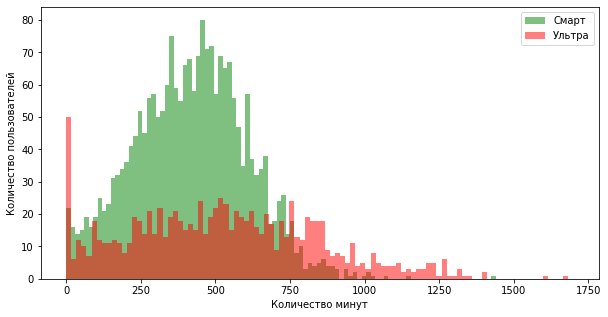

In [39]:
#построим гистрограммы для обоих тарифов
plt.figure(figsize = (10,5))
plt.hist(data.query('tariff =="smart"')['month_calls_duration'], bins=100, alpha=0.5, label='Смарт', range = (0, 1500), color='green')
plt.hist(data.query('tariff =="ultra"')['month_calls_duration'], bins=100, alpha=0.5, label='Ультра', range = (0, 1700), color='red')
plt.legend(loc='upper right')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')

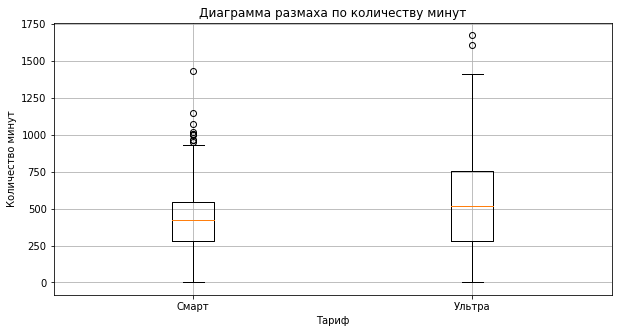

In [40]:
#построим диаграмму размаха
plt.figure(figsize = (10,5))
plt.boxplot([data.query('tariff =="smart"')['month_calls_duration'], data.query('tariff =="ultra"')['month_calls_duration']])
plt.title('Диаграмма размаха по количеству минут')
plt.xlabel('Тариф')
plt.ylabel('Количество минут')
plt.xticks([1, 2],['Смарт', 'Ультра'])
plt.grid()

In [41]:
print('Процент пользователей тарифа Смарт, превыщающих лимит по минутам: {:.2%}'.format(
    smart[smart['month_calls_duration'] > 500].shape[0]/smart['month_calls_duration'].shape[0]))

print('Процент пользователей тарифа Ультра, превыщающих лимит по минутам: {:.2%}'.format(
    ultra[ultra['month_calls_duration'] > 3000].shape[0]/ultra['month_calls_duration'].shape[0]))


Процент пользователей тарифа Смарт, превыщающих лимит по минутам: 33.83%
Процент пользователей тарифа Ультра, превыщающих лимит по минутам: 0.00%


**Вывод**

По графику видно, что у части пользователей имееются нули в длительности звоноков - помним, что это непринятые вызовы. 
Большая часть пользователей тарифа Смарт разговаривает примерно 260-515 минут в месяц, а тарифа Ультра - 260-750 минут в месяц. Получается, что в среднем, пользователи обоих тарифов разговаривают около 500 минут в месяц. 
При этом, среди пользователей тарифа Смарт треть пользователей, ввиду небольшого количества включенных минут, выходят за рамки включенного пакета (500 минут).

## Количество отправленных смс в месяц

In [42]:
data.groupby('tariff')\
  .agg({'message_total_in_month':['count','median','mean','var','std', 'max']})\
  .style.format("{:.2f}")

Text(0, 0.5, 'Количество пользователей')

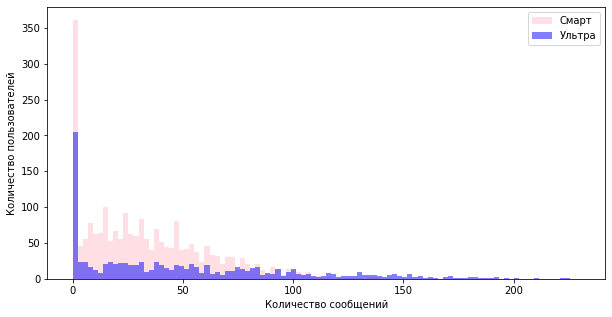

In [43]:
plt.figure(figsize = (10,5))
plt.hist(data.query('tariff =="smart"')['message_total_in_month'], bins=100, alpha=0.5, label='Смарт', range = (0, 230), color='pink')
plt.hist(data.query('tariff =="ultra"')['message_total_in_month'], bins=100, alpha=0.5, label='Ультра', range = (0, 230), color='blue')
plt.legend(loc='upper right')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')

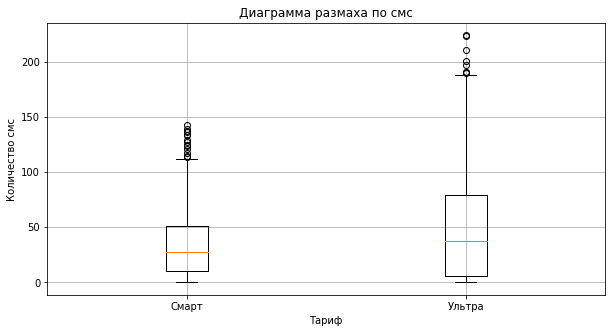

In [44]:
plt.figure(figsize = (10,5))
plt.boxplot([data.query('tariff =="smart"')['message_total_in_month'], data.query('tariff =="ultra"')['message_total_in_month']])
plt.title('Диаграмма размаха по смс')
plt.xlabel('Тариф')
plt.ylabel('Количество смс')
plt.xticks([1, 2],['Смарт', 'Ультра'])
plt.grid()

In [45]:
print('Процент пользователей тарифа Смарт, превыщающие лимит по сообщениям: {:.2%}'.format(
    smart[smart['message_total_in_month'] > 50].shape[0]/smart['message_total_in_month'].shape[0]))

print('Процент пользователей тарифа Ультра, превыщающие лимит по сообщениям: {:.2%}'.format(
    ultra[ultra['message_total_in_month'] > 1000].shape[0]/ultra['message_total_in_month'].shape[0]))

Процент пользователей тарифа Смарт, превыщающие лимит по сообщениям: 25.30%
Процент пользователей тарифа Ультра, превыщающие лимит по сообщениям: 0.00%


**Вывод**

Часть пользователей обоих тарифов в целом не пользуются смс. При этом, большая часть пользователей обоих тарифов, пользующихся данной услугой, отправляет не более 50 сообщений в месяц. Доля пользователей, превыщающая порог в 50 смс тарифа Смарт составляет порядка 25%. 

## Количество потраченного интернет-трафика в месяц

In [46]:
data.groupby('tariff')\
  .agg({'mb_total_in_month':['count','median','mean','var','std', 'max']})\
  .style.format("{:.2f}")

Text(0, 0.5, 'Количество пользователей')

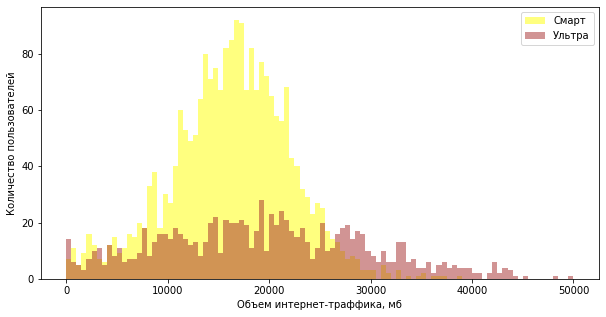

In [47]:
plt.figure(figsize = (10,5))
plt.hist(data.query('tariff =="smart"')['mb_total_in_month'], bins=100, alpha=0.5, label='Смарт', range = (0, 50000), color='yellow')
plt.hist(data.query('tariff =="ultra"')['mb_total_in_month'], bins=100, alpha=0.5, label='Ультра', range = (0, 50000), color='brown')
plt.legend(loc='upper right')
plt.xlabel('Объем интернет-траффика, мб')
plt.ylabel('Количество пользователей')

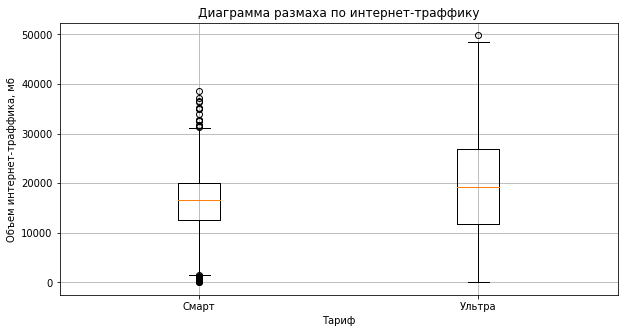

In [48]:
plt.figure(figsize = (10,5))
plt.boxplot([data.query('tariff =="smart"')['mb_total_in_month'], data.query('tariff =="ultra"')['mb_total_in_month']])
plt.title('Диаграмма размаха по интернет-траффику')
plt.xlabel('Тариф')
plt.ylabel('Объем интернет-траффика, мб')
plt.xticks([1, 2],['Смарт', 'Ультра'])
plt.grid()

In [49]:
print('Процент пользователей тарифа Смарт, превыщающие лимит по интернет-траффику: {:.2%}'.format(
    smart[smart['mb_total_in_month'] > 15360].shape[0]/smart['mb_total_in_month'].shape[0]))

print('Процент пользователей тарифа Ультра, превыщающие лимит по интернет-траффику:: {:.2%}'.format(
    ultra[ultra['mb_total_in_month'] > 30720].shape[0]/ultra['mb_total_in_month'].shape[0]))

Процент пользователей тарифа Смарт, превыщающие лимит по интернет-траффику: 58.73%
Процент пользователей тарифа Ультра, превыщающие лимит по интернет-траффику:: 13.60%


**Вывод**

Большая часть пользователей использует до 20 гб в месяц. При этом больше половины пользователей тарифа Смарт выходят за лимиты пакета в 15 гб. 

## Общий вывод

По итогам проведенного анализа данных можно сделать следующие выводы: 
 * пользователей тарифа Смарт больше в 2,36 раза, чем пользователей тарифа Ультра; 
 * почти 75% пользователей тарифа Смарт оплачивают дополнительные услуги сверх пакета, тогда как доля таких пользователей у тарифа Ультра составляет только 14%;
 * во всех случаях (минуты, смс, интернет) дисперсия по тарифу Ультра выше, чем у тарифа Смарт, что говорит о том, что по тарифу Ультра имеется больший диапазон значений вокруг среднего значения. 
 * пользователи тарифа Смарт чаще выходят за лимиты своего пакета (особенно это заметно по интернет-траффику);
 * в среднем в месяц пользователи обоих пакетов используют 500 минут, 50 сообщений и до 20 гб интернет-траффика.
 

# Проверка гипотез

Проверим следующие гипотезы:
1. средняя выручка пользователей тарифов Ультра и Смарт различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Средняя выручка пользователей тарифов Ультра и Смарт различаются

Сформулируем гипотезы: 
   * H0 - средняя выручка пользователей двух тарифов не отличается, 
   * H1 - средняя выручка пользователей двух тарифов отличается.

Гипотезу будем проверять с помощью t-теста т.к. мы делаем предположение о равенстве средних двух независимых совокупностей.

In [50]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

smart = data.query('tariff =="smart"')['revenue']
ultra = data.query('tariff =="ultra"')['revenue']

result = st.ttest_ind(smart, ultra) #проверим гипотезу о равенстве средних двух независимых совокупностей

print('р-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

р-значение: 1.1799810154372117e-190
Отвергаем нулевую гипотезу


Значение статистической значимости превышает критический уровень статистической значимости, поэтому мы отвергаем нулевую гипотезу: средняя выручка двух тарифов отличается друг от друга. 

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем гипотезы:

* H0 - средняя выручка пользователей из Москвы не отличается от пользователей из других городов,
* H1 - средняя выручка пользователей из Москвы отличается от пользователей из других городов.

Гипотезу будем проверять с помощью t-теста т.к. мы делаем предположение о равенстве средних двух независимых совокупностей.

In [51]:
alpha = 0.05

moscow = data.query('city =="Москва"')['revenue']
other = data.query('city !="Москва"')['revenue']

result = st.ttest_ind(moscow, other) 

print('р-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

р-значение: 0.47434565342568924
Не отвергаем нулевую гипотезу


Значение статистической значимости не превышает критический уровень статистической значимости, поэтому мы не отвергаем нулевую гипотезу: средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других городов.

# Общий вывод

**Кратный обзор выполненных работ**:

Ход исследования был разделен на четыре части: 
1. Обзор данных.
2. Предобработка данных.
3. Анализ данных.
4. Проверка гипотез. 

В рамках первой части был сделан обзор предоставленных данных, в ходе которого были выявлены некоторые проблемы, в основном связанные с неверным форматом предоставленных данных. 

В рамках второй части "Предобработка данных" была проведена проверка на наличие дубликатов, поиск пропусков, а также тип данных приведен к нужному. Так же в рамках этой части были рассчитаны и добавлены новые показатели в таблицу (количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя.)

В третьей части исследования был проведен анализ данных: были подробно исследованы такие параметры как: количество необходимых минут, количество смс и интернет-траффика в месяц. А также посчитано количество пользователей у каждого тарифа и доли платящих сверх тарифов. 

В четвертой части исследования была проведена проверка двух гипотез (о равенстве средней выручки пользователей двух тарифов и о равенстве выручки пользователей Москвы и других регионов)


**Основные выводы**:

 1. Количество пользователей тарифа Смарт превышает пользователей тарифа Ультра в 2,36 раза, что сказывается на общем объеме потраченных в месяц минут, смс и интернет-траффика. 
 2. В среднем в месяц пользователям обоих пакетов требуется 500 минут, 50 сообщений и до 20 гб интернет-траффика.
 3. Пользователи тарифа Смарт чаще выходят за лимиты пакета, что подтверждается тем, что среди данных пользователей 76% платят дополнительно. 
 4. Была проведена проверка двух гипотез:
      1. средняя выручка пользователей тарифов Ультра и Смарт различаются,
      2. средняя выручка пользователей из Москвы не отличается от пользователей из других городов,
    
    первая гипотеза не подтвердилась, вторая подтвердилась. 
    


**Общие рекомендации**:

Для того, чтобы сформулировать общие рекомендации посмотрим сводную таблицу, чтобы понять, какой из тарифов все-таки приносит больше выручки.

In [52]:
#построим своднуб таблицу для двух тарифов по сумме выручки
final_table = data.pivot_table(index='tariff', values = 'revenue', aggfunc ='sum')
final_table.columns = ['Общая выручка']
#добавим еще одну колонку, где будет рассчитана доля выручки, приходящаяся на тариф
final_table['% от общей выручки'] = final_table['Общая выручка'] / final_table['Общая выручка'].sum()
final_table

,Общая выручка,% от общей выручки
tariff,,
smart,2749149.0,0.575284
ultra,2029622.0,0.424716


Как видно из сводной таблицы выше - большая часть выручка (57,5%) генерируется за счет пользователей тарифа Смарт, вероятнее всего, это связано с тем, что пользователей данного тарифа больше и 76% из них выходят за рамки пакетных лимитов, т.е. им приходится оплачивать услуги дополнительно. 

Есть смысл вкладывать больше денег в рекламный бюджет для тарифа Смарт для привлечения новых пользователей. 